In [13]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/opt/homebrew/lib/python3.9/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [14]:
# Perfect sensor
def sense(x):
    return x

In [15]:
def simulate(Δt, x, u):
    x += Δt * u
    return x

In [16]:
import math 
from numpy import array, sin, cos

def circle_control(t, y):
    ### WRITE YOUR CONTROL POLICY HERE:
    ux = -sin(t) #x = sin(t)
    uy = cos(t) #y = cos(t)
    return array([ux, uy])

In [17]:
import math 
from numpy import array, sin, cos

def line_control(t, y):
    ### WRITE YOUR CONTROL POLICY HERE:
    ux = (t)
    uy = (t)
    return array([ux, uy])

In [23]:
import numpy as np

# Simulation parameters
tf = 10.0    # Final time
Δt = 0.1    # Time step
time = np.linspace(0., tf, int(tf / Δt) + 1)  # Time interval

# Initial conditions
x = array([2., 1.])
x_log = [np.copy(x)]

for t in time:
    y = sense(x)
    u = line_control(t, y)    
    x = simulate(Δt, x, u)
    x_log.append(np.copy(x))
    
x_log = np.array(x_log)

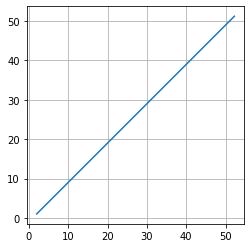

In [19]:
from matplotlib.pyplot import grid, plot, figure

# depict illustration
fig = figure()
ax = fig.add_subplot()

# square plot
ax.set_aspect('equal', adjustable='box')
grid()
plot(x_log[:,0], x_log[:,1])

In [32]:
import numpy as np

# Simulation parameters
tf = 10.0    # Final time
Δt = .1      # Time step
time = np.linspace(0., tf, int(tf / Δt) + 1)  # Time interval

# Initial conditions
x = array([2., 1.])
x_log = [np.copy(x)]

for t in time:
    y = sense(x)
    u = circle_control(t, y)    
    x = simulate(Δt, x, u)
    x_log.append(np.copy(x))
    
x_log = np.array(x_log)

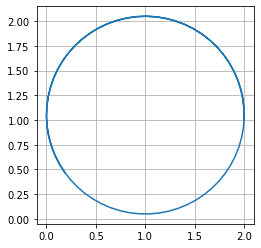

In [33]:
from matplotlib.pyplot import grid, plot, figure

# depict illustration
fig = figure()
ax = fig.add_subplot()

# square plot
ax.set_aspect('equal', adjustable='box')
grid()
plot(x_log[:,0], x_log[:,1])

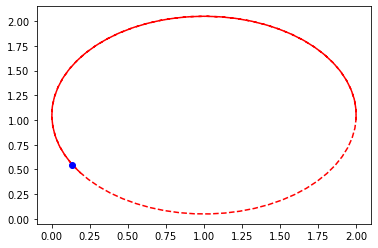

In [27]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
fig, ax = plt.subplots()

def animate(t):
    ax.clear()
    
    # Path
    plot(x_log[:,0], x_log[:,1], 'r--')
    
    # Initial conditions
    plot(x_log[t,0], x_log[t,1], 'bo')
    
anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)
HTML(anim.to_jshtml())